# **1. Preparación del Entorno**

<font font-family="Consolas Bold">En esta sección, configuramos el entorno de trabajo para nuestro análisis de datos. Esto incluye la importación de bibliotecas esenciales como Pandas para la manipulación de datos, Scikit-learn para técnicas de aprendizaje automático, y Plotly para visualizaciones avanzadas. La preparación adecuada del entorno es crucial para garantizar que todas las herramientas necesarias estén disponibles y funcionen correctamente, lo que facilita un flujo de trabajo eficiente y libre de errores.</font>

In [8]:
# Importar pandas
import pandas as pd

# Cargar el archivo CSV
data_path = '/content/drive/MyDrive/ML&BD/Crimenes.csv'
df = pd.read_csv(data_path)

# Mostrar las primeras filas del conjunto de datos
print("Cabeza:\n" + str(df.head()) + "\n\nCola:\n" + str(df.tail()) + "\n\nDescripción:\n" + str(df.describe()))

Cabeza:
       Estado  Asesinatos  Asaltos  Poblacion Urbana  Violaciones
0     Alabama        13.2      236                58         21.2
1      Alaska        10.0      263                48         44.5
2     Arizona         8.1      294                80         31.0
3    Arkansas         8.8      190                50         19.5
4  California         9.0      276                91         40.6

Cola:
           Estado  Asesinatos  Asaltos  Poblacion Urbana  Violaciones
45       Virginia         8.5      156                63         20.7
46     Washington         4.0      145                73         26.2
47  West Virginia         5.7       81                39          9.3
48      Wisconsin         2.6       53                66         10.8
49        Wyoming         6.8      161                60         15.6

Descripción:
       Asesinatos     Asaltos  Poblacion Urbana  Violaciones
count    50.00000   50.000000         50.000000    50.000000
mean      7.78800  170.760000    

# **2. Análisis Exploratorio de Datos**
El análisis exploratorio es un paso fundamental en cualquier proyecto de ciencia de datos. Aquí, utilizamos Mapas Coropléticos con 'go.Choropleth' de Plotly para obtener una representación visual intuitiva de la distribución geográfica de nuestros datos. Además, implementamos una Matriz de Correlación para identificar posibles relaciones entre diferentes variables. Estas técnicas nos permiten obtener una comprensión más profunda de los datos y guiar las decisiones futuras sobre el modelado y la selección de características.

In [49]:
#@title Todos los Estados del DataFrame
estados = df['Estado']

# Lista para guardar los estados del DataFrame
listaEstados = []

# Bucle for para obtener y guardar los estados en lista
for estado in estados:
  listaEstados.append(estado)
print(listaEstados)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [50]:
#@title Diccionario para almacenar los estados
estado_a_codigo = {}

# Bucle para llenar el diccionario con los estados y códigos en blanco
for estado in estados:
    estado_a_codigo[estado] = ""

# Imprimir el diccionario
for estado, codigo in estado_a_codigo.items():
    print(f'"{estado}": "{codigo}",')

"Alabama": "",
"Alaska": "",
"Arizona": "",
"Arkansas": "",
"California": "",
"Colorado": "",
"Connecticut": "",
"Delaware": "",
"Florida": "",
"Georgia": "",
"Hawaii": "",
"Idaho": "",
"Illinois": "",
"Indiana": "",
"Iowa": "",
"Kansas": "",
"Kentucky": "",
"Louisiana": "",
"Maine": "",
"Maryland": "",
"Massachusetts": "",
"Michigan": "",
"Minnesota": "",
"Mississippi": "",
"Missouri": "",
"Montana": "",
"Nebraska": "",
"Nevada": "",
"New Hampshire": "",
"New Jersey": "",
"New Mexico": "",
"New York": "",
"North Carolina": "",
"North Dakota": "",
"Ohio": "",
"Oklahoma": "",
"Oregon": "",
"Pennsylvania": "",
"Rhode Island": "",
"South Carolina": "",
"South Dakota": "",
"Tennessee": "",
"Texas": "",
"Utah": "",
"Vermont": "",
"Virginia": "",
"Washington": "",
"West Virginia": "",
"Wisconsin": "",
"Wyoming": "",


In [51]:
#@title Mapeo de nombres de estados a códigos de dos letras
estado_a_codigo = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY"
}

# Otra instancia del  DF
df_edit = pd.read_csv(data_path)

# Aplicar el mapeo al DataFrame
df_edit['CodigoEstado'] = df_edit['Estado'].map(estado_a_codigo)

# Asegurarse de que todos los estados tienen un código
assert df_edit['CodigoEstado'].isnull().sum() == 0, "Algunos estados no tienen códigos asignados"

# Coordenadas predefinidas para los estados
coordenadas_estados = {
    "Alabama": (32.806671, -86.791130),
    "Alaska": (61.370716, -152.404419),
    "Arizona": (33.729759, -111.431221),
    "Arkansas": (34.969704, -92.373123),
    "California": (36.116203, -119.681564),
    "Colorado": (39.059811, -105.311104),
    "Connecticut": (41.597782, -72.755371),
    "Delaware": (39.318523, -75.507141),
    "Florida": (27.766279, -81.686783),
    "Georgia": (33.040619, -83.643074),
    "Hawaii": (21.094318, -157.498337),
    "Idaho": (44.240459, -114.478828),
    "Illinois": (40.349457, -88.986137),
    "Indiana": (39.849426, -86.258278),
    "Iowa": (42.011539, -93.210526),
    "Kansas": (38.526600, -96.726486),
    "Kentucky": (37.668140, -84.670067),
    "Louisiana": (31.169546, -91.867805),
    "Maine": (44.693947, -69.381927),
    "Maryland": (39.063946, -76.802101),
    "Massachusetts": (42.230171, -71.530106),
    "Michigan": (43.326618, -84.536095),
    "Minnesota": (45.694454, -93.900192),
    "Mississippi": (32.741646, -89.678696),
    "Missouri": (38.456085, -92.288368),
    "Montana": (46.921925, -110.454353),
    "Nebraska": (41.125370, -98.268082),
    "Nevada": (38.313515, -117.055374),
    "New Hampshire": (43.452492, -71.563896),
    "New Jersey": (40.298904, -74.521011),
    "New Mexico": (34.840515, -106.248482),
    "New York": (42.165726, -74.948051),
    "North Carolina": (35.630066, -79.806419),
    "North Dakota": (47.528912, -99.784012),
    "Ohio": (40.388783, -82.764915),
    "Oklahoma": (35.565342, -96.928917),
    "Oregon": (44.572021, -122.070938),
    "Pennsylvania": (40.590752, -77.209755),
    "Rhode Island": (41.680893, -71.511780),
    "South Carolina": (33.856892, -80.945007),
    "South Dakota": (44.299782, -99.438828),
    "Tennessee": (35.747845, -86.692345),
    "Texas": (31.054487, -97.563461),
    "Utah": (40.150032, -111.862434),
    "Vermont": (44.045876, -72.710686),
    "Virginia": (37.769337, -78.169968),
    "Washington": (47.400902, -121.490494),
    "West Virginia": (38.491226, -80.954570),
    "Wisconsin": (44.268543, -89.616508),
    "Wyoming": (42.755966, -107.302490)
}

# Añadir las coordenadas de latitud y longitud al DataFrame
df_edit['Latitud'] = df_edit['Estado'].map(lambda x: coordenadas_estados.get(x, (None, None))[0])
df_edit['Longitud'] = df_edit['Estado'].map(lambda x: coordenadas_estados.get(x, (None, None))[1])

from sklearn.preprocessing import MinMaxScaler

# Escalar las métricas de crímenes a un rango de tamaños de burbuja para el mapa de plotly
scaler = MinMaxScaler(feature_range=(10, 50))
df_edit['Asesinatos_escalados'] = scaler.fit_transform(df_edit[['Asesinatos']])
df_edit['Asaltos_escalados'] = scaler.fit_transform(df_edit[['Asaltos']])
df_edit['Violaciones_escaladas'] = scaler.fit_transform(df_edit[['Violaciones']])

In [52]:
df.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,cluster,Nivel_Peligrosidad
0,Alabama,13.2,236,58,21.2,1,Media Peligrosidad
1,Alaska,10.0,263,48,44.5,1,Media Peligrosidad
2,Arizona,8.1,294,80,31.0,1,Media Peligrosidad
3,Arkansas,8.8,190,50,19.5,0,Alta Peligrosidad
4,California,9.0,276,91,40.6,1,Media Peligrosidad


In [53]:
df_edit.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,CodigoEstado,Latitud,Longitud,Asesinatos_escalados,Asaltos_escalados,Violaciones_escaladas
0,Alabama,13.2,236,58,21.2,AL,32.806671,-86.791130,39.879518,36.164384,24.366925
1,Alaska,10.0,263,48,44.5,AK,61.370716,-152.404419,32.168675,39.863014,48.449612
2,Arizona,8.1,294,80,31.0,AZ,33.729759,-111.431221,27.590361,44.109589,34.496124
3,Arkansas,8.8,190,50,19.5,AR,34.969704,-92.373123,29.277108,29.863014,22.609819
4,California,9.0,276,91,40.6,CA,36.116203,-119.681564,29.759036,41.643836,44.418605


# **3. Gráficos del Análisis**

En esta fase, nos centramos en visualizar los hallazgos de nuestro análisis exploratorio. Los gráficos no solo facilitan la interpretación de los datos, sino que también ayudan a comunicar los resultados de manera efectiva. Utilizamos diversas herramientas de visualización para representar las tendencias, patrones y anomalías en los datos, lo que nos permite validar nuestras hipótesis iniciales y ajustar nuestras estrategias de modelado.

In [9]:
#@title Gráfico de Crimen y Población Urbana: Seleccionar las categorías para visualizar mas detalladamente
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear subplots
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.3, 0.9],
    subplot_titles=('Población Urbana por Estado', 'Mapa de Crimen'),
    specs=[[{"type": "xy"}, {"type": "geo"}]]
)

# Ordenar el DataFrame por 'Poblacion Urbana' de manera ascendente
df_ordenado = df_edit.sort_values('Poblacion Urbana')

# Añadir gráfico de barras para Población Urbana
fig.add_trace(
    go.Bar(
        y=df_ordenado['Estado'],
        x=df_ordenado['Poblacion Urbana'],
        orientation='h',
        marker=dict(color=df_ordenado['Poblacion Urbana'], colorscale='Cividis'),
        name='Población Urbana'
    ),
    row=1, col=1
)

# Crear una nueva columna con la información que quieres mostrar
df_edit['hover_text'] = df_edit['Estado'] + ': Población Urbana: ' + df_edit['Poblacion Urbana'].astype(str)

# Añadir mapa coroplético para Población Urbana
fig.add_trace(go.Choropleth(
    locations=df_edit['CodigoEstado'],  # Usar códigos de estado con esta nueva columna
    z=df_edit['Poblacion Urbana'],
    text=df_edit['hover_text'],  # Usar la nueva columna para el texto al pasar el cursor
    locationmode='USA-states',
    colorscale='Cividis',
    colorbar=dict(y=0.4),
    colorbar_title='Población Urbana',
    showscale=True,
    hoverinfo='text'  # Mostrar solo el texto al pasar el cursor
), row=1, col=2)

# Añadir burbujas para mostrar Asesinatos
fig.add_trace(go.Scattergeo(
    lon=df_edit['Longitud'],
    lat=df_edit['Latitud'],
    text=df_edit['Estado'] + ": Asesinatos " + df_edit['Asesinatos'].astype(str),
    marker=dict(
        color='red',
        size=df_edit['Asesinatos_escalados'],
        sizemode='diameter'
    ),
    name='Asesinatos'
), row=1, col=2)

#  Añadir burbujas para mostrar Asaltos
fig.add_trace(go.Scattergeo(
    lon=df_edit['Longitud'],
    lat=df_edit['Latitud'],
    text=df_edit['Estado'] + ": Asaltos " + df['Asaltos'].astype(str),
    marker=dict(
        color='green',
        size=df_edit['Asaltos_escalados'],
        sizemode='diameter'
    ),
    name='Asaltos'
), row=1, col=2)

# Añadir burbujas para mostrar Violaciones
fig.add_trace(go.Scattergeo(
    lon=df_edit['Longitud'],
    lat=df_edit['Latitud'],
    text=df_edit['Estado'] + ": Violaciones " + df_edit['Violaciones'].astype(str),
    marker=dict(
        color='blue',
        size=df_edit['Violaciones_escaladas'],
        sizemode='diameter'
    ),
    name='Violaciones'
), row=1, col=2)

# Configurar el layout del gráfico
fig.update_layout(
    title_text='Crimen y Población Urbana en Estados Unidos',
    title_x=0.5,
    geo=dict(
        scope='usa',
        domain=dict(x=[0.3, 1], y=[0, 1]),
        showland=True,
        landcolor="rgb(217, 217, 217)",
        subunitcolor="rgb(255, 255, 255)",
        countrycolor="rgb(255, 255, 255)",
        countrywidth=0.5,
        subunitwidth=0.5
    ),
    width=1200,
    height=900
)

# Mostrar el gráfico
fig.show()


<ipython-input-10-a9e6038d1c85>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



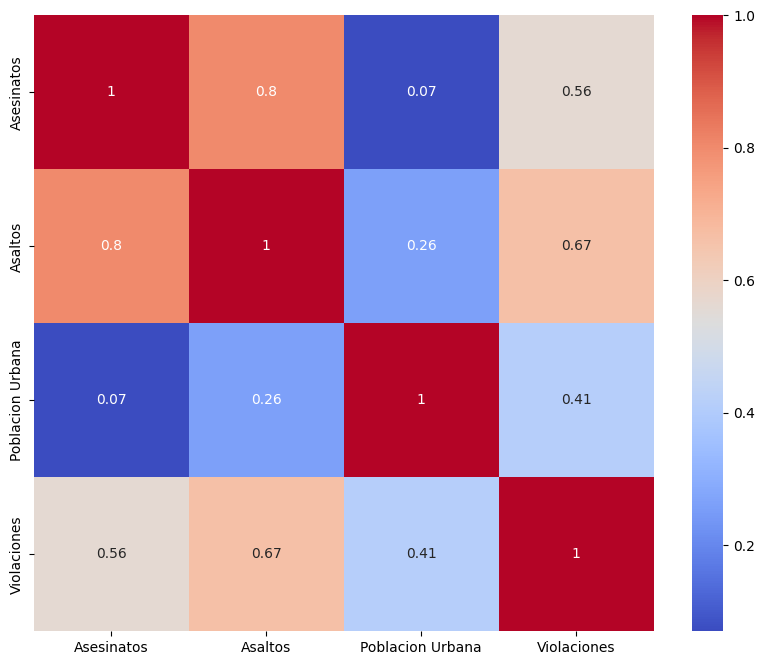

In [10]:
# @title Matriz de Correlación

import seaborn as sns
import matplotlib.pyplot as plt

# Analisis de correlacion
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [11]:
# @title Correlaciones Ordenadas
import pandas as pd

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Aplanar la matriz y convertirla en un DataFrame
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Variable1', 'Variable2', 'Correlación']

# Filtrar autocorrelaciones
corr_pairs = corr_pairs[corr_pairs['Variable1'] != corr_pairs['Variable2']]

# Ordenar por valor absoluto de correlación, de mayor a menor
corr_pairs['AbsCorrelación'] = corr_pairs['Correlación'].abs()
corr_pairs_sorted = corr_pairs.sort_values('AbsCorrelación', ascending=False)

# Mostrar los resultados
print(corr_pairs_sorted)

           Variable1         Variable2  Correlación  AbsCorrelación
1         Asesinatos           Asaltos     0.801873        0.801873
4            Asaltos        Asesinatos     0.801873        0.801873
7            Asaltos       Violaciones     0.665241        0.665241
13       Violaciones           Asaltos     0.665241        0.665241
3         Asesinatos       Violaciones     0.563579        0.563579
12       Violaciones        Asesinatos     0.563579        0.563579
11  Poblacion Urbana       Violaciones     0.411341        0.411341
14       Violaciones  Poblacion Urbana     0.411341        0.411341
6            Asaltos  Poblacion Urbana     0.258872        0.258872
9   Poblacion Urbana           Asaltos     0.258872        0.258872
2         Asesinatos  Poblacion Urbana     0.069573        0.069573
8   Poblacion Urbana        Asesinatos     0.069573        0.069573


<ipython-input-11-3551930b605c>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



- **Correlaciones Altas:** Las correlaciones más altas se encuentran entre "Asesinatos" y "Asaltos" (0.80), seguidas por "Asaltos" y "Violaciones" (0.67), y "Asesinatos" y "Violaciones" (0.56). Estas correlaciones sugieren una fuerte relación entre estos tipos de crímenes.

- **Correlaciones Moderadas:** Hay correlaciones moderadas entre "Población Urbana" y "Violaciones" (0.41), y entre "Población Urbana" y "Asaltos" (0.26).

- **Correlaciones Bajas:** Las correlaciones más bajas se observan entre "Población Urbana" y "Asesinatos" (0.07). Esto indica que la relación entre la población urbana y la tasa de asesinatos es relativamente débil en comparación con otras correlaciones.

# **4. Implementación K-means**

La implementación del algoritmo K-means es un paso crítico en nuestro proyecto. Elegimos este método de clustering por su eficiencia y efectividad en la identificación de grupos homogéneos dentro de los datos. Realizamos un análisis de codo para determinar el número óptimo de clusters, asegurando así que el modelo esté bien ajustado a nuestros datos. Esta etapa es crucial para la segmentación precisa y la interpretación significativa de los resultados.

In [54]:
# @title Preprocesamiento de Datos
from sklearn.preprocessing import StandardScaler

# Selecciona las columnas para el clustering
X = df[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']]

# Normaliza los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.cluster import KMeans

# Crea una instancia de KMeans
kmeans = KMeans(n_clusters=3, random_state=0)

# Ajusta el modelo y predice las etiquetas de los clusters
labels = kmeans.fit_predict(X)

# Agrega las etiquetas al DataFrame
df['cluster'] = labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [55]:
df.tail()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,cluster,Nivel_Peligrosidad
45,Virginia,8.5,156,63,20.7,2,Alta Peligrosidad
46,Washington,4.0,145,73,26.2,2,Alta Peligrosidad
47,West Virginia,5.7,81,39,9.3,0,Baja Peligrosidad
48,Wisconsin,2.6,53,66,10.8,0,Baja Peligrosidad
49,Wyoming,6.8,161,60,15.6,2,Alta Peligrosidad


<ipython-input-56-a9e6038d1c85>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



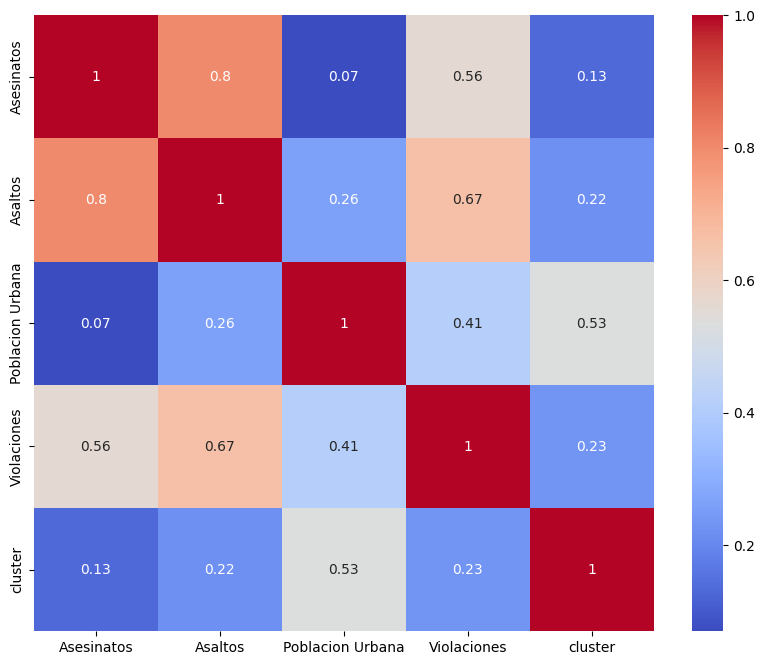

In [56]:
# @title Matriz de Correlación

import seaborn as sns
import matplotlib.pyplot as plt

# Analisis de correlacion
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [60]:
#@title Gráfico de Dispersión Scatter Matrix (relaciones bivariadas entre pares de variables)
import plotly.express as px

# Selecciona solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Agrega la columna 'cluster'
df_numeric['cluster'] = df['cluster']

# Crea el gráfico
fig = px.scatter_matrix(df_numeric,
    dimensions=["Asesinatos", "Asaltos", "Poblacion Urbana", "Violaciones"],
    color="cluster",
    title="Pair plot of features",
    labels={col: col for col in df_numeric.columns},
    symbol="cluster"  # Usa diferentes símbolos para cada cluster
)

# Ajusta el tamaño del gráfico
fig.update_layout(
    width=1200,  # Ajusta el ancho
    height=1000,  # Ajusta la altura
    margin=dict(l=20, r=20, b=20, t=100),  # Ajusta los márgenes
    legend=dict(
        orientation="h",  # Horizontal
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template="plotly_dark"  # Aplica el tema oscuro
)

# Ajusta el tamaño y estilo de los marcadores
fig.update_traces(marker=dict(size=7, line=dict(width=1, color='darkslateblue')))

fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



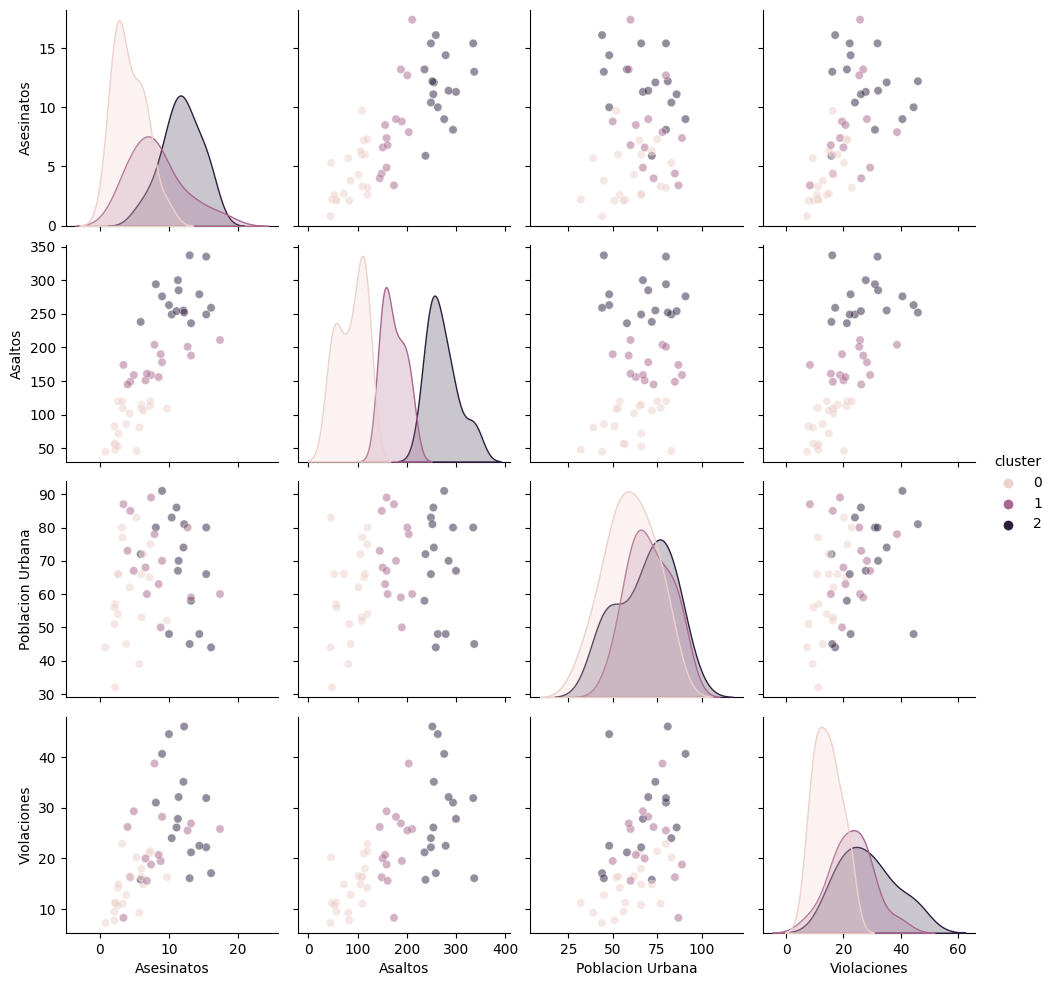

In [58]:
#@title Gráfico de Disperción Pairplot (distribuciones univariadas en la diagonal)

import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que ya tienes un DataFrame df_edit y quieres realizar el clustering
# Selecciona solo las columnas numéricas para el clustering
df_numeric = df_edit.select_dtypes(include=['float64', 'int64'])

# Ajusta el modelo KMeans
kmeans = KMeans(n_clusters=3)  # Ajusta el número de clusters según sea necesario
df_edit['cluster'] = kmeans.fit_predict(df_numeric)

# Ahora usa seaborn para visualizar
sns.pairplot(df_edit[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones', 'cluster']],
             hue='cluster',
             plot_kws={'alpha': 0.5})

plt.show()


In [59]:
# @title Análisis de codo para determinar el número óptimo de clusters para el modelo K-means
import plotly.graph_objects as go
from sklearn.cluster import KMeans

# Rango de valores de k para probar
k_values = range(1, 10)

# Lista para guardar las inercias para cada valor de k
inertias = []

for k in k_values:
    # Crea y ajusta el modelo KMeans
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(X)
    # Agrega la inercia a la lista
    inertias.append(model.inertia_)

# Crear el gráfico con Plotly
fig = go.Figure(data=go.Scatter(x=list(k_values), y=inertias, mode='lines+markers'))
fig.update_layout(
    title='Análisis de Codo para K-means Clustering',
    xaxis_title='Número de clusters, k',
    yaxis_title='Inercia',
    xaxis=dict(tickmode='array', tickvals=list(k_values)),
    plot_bgcolor='rgb(23, 27, 31)',  # Fondo oscuro
    paper_bgcolor='rgb(23, 27, 31)',  # Fondo del papel oscuro
    font_color='white'  # Color de la fuente en blanco
)
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

# **5. Utimos Ajustes**

En la etapa final, realizamos ajustes finales en nuestro modelo y en las visualizaciones. Esto incluye la refinación de los parámetros del modelo, la mejora de las visualizaciones para una interpretación más clara, y la implementación de feedbacks recibidos durante el proceso de revisión. Estos ajustes son esenciales para asegurar la precisión y la relevancia de nuestro análisis en el contexto del proyecto.

In [61]:
#@title Preprocesamiento de Datos **df_edit**
from sklearn.preprocessing import StandardScaler

# Selecciona las columnas para el clustering
X = df_edit[['Asesinatos', 'Asaltos', 'Violaciones']]

# Normaliza los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.cluster import KMeans

# Crea una instancia de KMeans
kmeans = KMeans(n_clusters=4, random_state=0)

# Ajusta el modelo y predice las etiquetas de los clusters
labels = kmeans.fit_predict(X)

# Agrega las etiquetas al DataFrame
df_edit['cluster'] = labels


df_edit.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,CodigoEstado,Latitud,Longitud,Asesinatos_escalados,Asaltos_escalados,Violaciones_escaladas,cluster
0,Alabama,13.2,236,58,21.2,AL,32.806671,-86.791130,39.879518,36.164384,24.366925,3
1,Alaska,10.0,263,48,44.5,AK,61.370716,-152.404419,32.168675,39.863014,48.449612,0
2,Arizona,8.1,294,80,31.0,AZ,33.729759,-111.431221,27.590361,44.109589,34.496124,0
3,Arkansas,8.8,190,50,19.5,AR,34.969704,-92.373123,29.277108,29.863014,22.609819,2
4,California,9.0,276,91,40.6,CA,36.116203,-119.681564,29.759036,41.643836,44.418605,0


In [62]:
#@title Gráfico de Dispersión Scatter Matrix (clusters=n)

# Selecciona solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Ajusta el modelo KMeans
kmeans = KMeans(n_clusters=4)
df_edit['cluster'] = kmeans.fit_predict(df_numeric)

# Agrega la columna 'cluster'
df_numeric['cluster'] = df_edit['cluster']

# Crea el gráfico
fig = px.scatter_matrix(df_numeric,
    dimensions=["Asesinatos", "Asaltos", "Violaciones"],
    color="cluster",
    title="Pair plot of features",
    labels={col: col for col in df_numeric.columns},  # renames axis to column names
    symbol="cluster"  # Usa diferentes símbolos para cada cluster
)

# Ajusta el tamaño del gráfico
fig.update_layout(
    width=1200,  # Ajusta el ancho
    height=1000,  # Ajusta la altura
    margin=dict(l=20, r=20, b=20, t=100),  # Ajusta los márgenes si es necesario
    legend=dict(
        orientation="h",  # Horizontal
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template="plotly_dark"  # Aplica el tema oscuro
)

# Ajusta el tamaño y estilo de los marcadores
fig.update_traces(marker=dict(size=7, line=dict(width=1, color='darkslateblue')))

fig.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [66]:
#@title Grafico de Peligrosidad (4 clusters prueba inicial)
from sklearn.cluster import KMeans

# Ajustar el modelo K-means con el número óptimo de clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df_edit['cluster'] = kmeans.fit_predict(X)

# Visualizar los resultados en un mapa con Plotly
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_geo(df_edit,
                     lat='Latitud',
                     lon='Longitud',
                     color='cluster',
                     hover_name='Estado',
                     title='Mapa de Zonas de Peligrosidad Basado en Clusters')

# Actualizar el layout del mapa
fig.update_layout(
    title_text='Mapa de Calor de Peligrosidad en Estados Unidos',
    geo_scope='usa',  # Limitar el mapa a Estados Unidos
)

# fig.show()

# Combinar con mapa coropleth del principio ( parece tener sentido con 4 clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [76]:
# @title Preprocesamiento de Datos 2 clusters
from sklearn.preprocessing import StandardScaler

# Selecciona las columnas para el clustering
X = df_edit[['Asesinatos', 'Asaltos', 'Violaciones']]

# Normaliza los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.cluster import KMeans

# Crea una instancia de KMeans
kmeans = KMeans(n_clusters=2, random_state=0)

# Ajusta el modelo y predice las etiquetas de los clusters
labels = kmeans.fit_predict(X)

# Agrega las etiquetas al DataFrame
df_edit['cluster'] = labels


df_edit.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,CodigoEstado,Latitud,Longitud,Asesinatos_escalados,Asaltos_escalados,Violaciones_escaladas,cluster,hover_text,Nivel_Peligrosidad
0,Alabama,13.2,236,58,21.2,AL,32.806671,-86.791130,39.879518,36.164384,24.366925,1,Alabama: Población Urbana: 58,NaN
1,Alaska,10.0,263,48,44.5,AK,61.370716,-152.404419,32.168675,39.863014,48.449612,1,Alaska: Población Urbana: 48,Baja Peligrosidad
2,Arizona,8.1,294,80,31.0,AZ,33.729759,-111.431221,27.590361,44.109589,34.496124,1,Arizona: Población Urbana: 80,Baja Peligrosidad
3,Arkansas,8.8,190,50,19.5,AR,34.969704,-92.373123,29.277108,29.863014,22.609819,0,Arkansas: Población Urbana: 50,NaN
4,California,9.0,276,91,40.6,CA,36.116203,-119.681564,29.759036,41.643836,44.418605,1,California: Población Urbana: 91,Baja Peligrosidad


In [77]:
# @title Grafico de Peligrosidad (2 clusters)
import plotly.graph_objects as go

# Asignar nombres a los clusters
# nombres_clusters = {0: 'Baja Peligrosidad', 1: 'Media Peligrosidad', 2: 'Alta Peligrosidad'}
nombres_clusters = {0: 'Baja Peligrosidad', 1: 'Alta Peligrosidad'}
df_edit['Nivel_Peligrosidad'] = df_edit['cluster'].map(nombres_clusters)

# Crear un mapa de calor
fig = go.Figure(data=go.Choropleth(
    locations=df_edit['CodigoEstado'],
    z=df_edit['cluster'],  # Usar la columna de cluster para el color
    text=df_edit['Nivel_Peligrosidad'],  # Mostrar el nivel de peligrosidad en el tooltip
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Nivel de Peligrosidad',
))

# Actualizar el layout del mapa
fig.update_layout(
    title_text='Mapa de Calor de Peligrosidad en Estados Unidos',
    geo_scope='usa',  # Limitar el mapa a Estados Unidos
    height=900
)

# Mostrar el mapa
fig.show()


# <h1><font color="#9900FF"> **Gráfico de Peligrosidad Coropleth** </font></h1>

Finalmente, presentamos un Gráfico de Peligrosidad Coropleth, que es el culmen de nuestro análisis. Este gráfico combina los resultados de nuestro modelo K-means con técnicas avanzadas de visualización para representar las zonas de diferente peligrosidad en un mapa interactivo. Esta visualización no solo destaca los resultados de nuestro análisis, sino que también proporciona una herramienta valiosa para la toma de decisiones y la planificación estratégica en contextos de seguridad y prevención del crimen.

In [74]:
#@title <h1><font color="#9900FF"> 4 Clusters + Detalles </font></h1>

import plotly.graph_objects as go

# Asignar nombres a los clusters
nombres_clusters = {0: 'Baja Peligrosidad', 1: 'Media Peligrosidad', 2: 'Media-Alta Peligrosidad', 3: 'Alta Peligrosidad'}
df_edit['Nivel_Peligrosidad'] = df_edit['cluster'].map(nombres_clusters)

# Crear un mapa de calor
fig = go.Figure(data=go.Choropleth(
    locations=df_edit['CodigoEstado'],  # Suponiendo que 'CodigoEstado' contiene los códigos de estado de EE. UU.
    z=df_edit['cluster'],  # Usar la columna de cluster para el color
    text=df_edit['Nivel_Peligrosidad'],  # Mostrar el nivel de peligrosidad en el tooltip
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Nivel de Peligrosidad',
))

# Añadir burbujas para mostrar Asesinatos
fig.add_trace(go.Scattergeo(
    lon=df_edit['Longitud'],
    lat=df_edit['Latitud'],
    text=df_edit['Estado'] + ": Asesinatos " + df_edit['Asesinatos'].astype(str),
    marker=dict(
        color='red',
        size=df_edit['Asesinatos_escalados'],
        sizemode='diameter'
    ),
    name='Asesinatos'
))

# Añadir burbujas para mostrar Asaltos
fig.add_trace(go.Scattergeo(
    lon=df_edit['Longitud'],
    lat=df_edit['Latitud'],
    text=df_edit['Estado'] + ": Asaltos " + df_edit['Asaltos'].astype(str),
    marker=dict(
        color='green',
        size=df_edit['Asaltos_escalados'],
        sizemode='diameter'
    ),
    name='Asaltos'
))

# Añadir burbujas para mostrar Violaciones
fig.add_trace(go.Scattergeo(
    lon=df_edit['Longitud'],
    lat=df_edit['Latitud'],
    text=df_edit['Estado'] + ": Violaciones " + df_edit['Violaciones'].astype(str),
    marker=dict(
        color='blue',
        size=df_edit['Violaciones_escaladas'],
        sizemode='diameter'
    ),
    name='Violaciones'
))

# Actualizar el layout del mapa
fig.update_layout(
    title_text='Mapa de Calor de Peligrosidad en Estados Unidos',
    geo_scope='usa',  # Limitar el mapa a Estados Unidos
    height=900,
    legend=dict(
        orientation="h",  # Horizontal
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Mostrar el mapa
fig.show()
